# TITANIC DATASET

This file contains how to generate test set predictions 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
surv_sex = data.groupby('Survived')['Sex'].value_counts()

In [6]:
pd.crosstab(data['Sex'],data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [7]:
surv_sex = surv_sex.groupby(level = 0).apply(lambda x : round(100 * x/x.sum()))

In [8]:
surv_sex.unstack().plot(kind = 'bar',stacked = True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sex_surv = data.groupby('Sex')['Survived'].value_counts()

In [11]:
sex_surv = sex_surv.groupby(level = 0).apply(lambda x : round(100 * x/x.sum()))

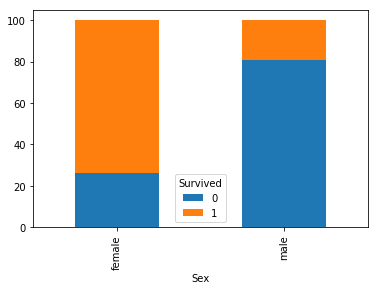

In [12]:
sex_surv.unstack().plot(kind = 'bar', stacked = True)

In [13]:
change = {
    "Sex" : {'male':1, 'female':0}
}

In [14]:
data.replace(change,inplace = True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
sns.set()

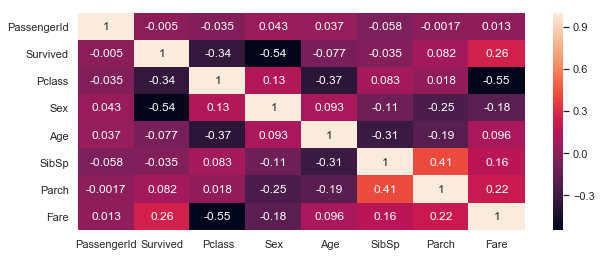

In [17]:
plt.figure(figsize = (10,4))
sns.heatmap(data.corr(), annot = True)    # annot = anotation for value

In [18]:
len(data.columns)

12

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
training_data = data[['PassengerId','Pclass','Sex','Fare']]

In [21]:
output_data = data['Survived']

In [22]:
training_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
dtype: int64

In [23]:
X,x_test,Y,y_test = train_test_split(training_data,output_data,test_size = 0.3)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X,Y)  #training

C:\Users\Prachi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
predictions = model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
confusion_matrix(y_test,predictions)

array([[143,  21],
       [ 32,  72]], dtype=int64)

In [30]:
accuracy_score(y_test,predictions)

0.8022388059701493

# Importing and predicting test set

In [31]:
data_test = pd.read_csv('test.csv')

In [32]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
change1 = {
    "Sex" : {'male':1, 'female':0}
}

In [34]:
data_test.replace(change,inplace = True)

In [35]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
data_test = data_test[['PassengerId','Pclass','Sex','Fare']]

In [37]:
data_test.head()

,PassengerId,Pclass,Sex,Fare
0,892,3,1,7.8292
1,893,3,0,7.0000
2,894,2,1,9.6875
3,895,3,1,8.6625
4,896,3,0,12.2875


In [38]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           1
dtype: int64

In [39]:
#1. remove null
#2. replace/impute null

In [40]:
data_test['Fare'] = data_test['Fare'].fillna(training_data['Fare'].mean())

In [41]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
dtype: int64

In [42]:
test_predictions = model.predict(data_test)

In [43]:
test_predictions[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [44]:
submission1 = {
    'PassengerId' : data_test['PassengerId'],
    'Survived' :test_predictions
}

In [45]:
submission1 = pd.DataFrame(submission1)

In [46]:
submission1 = submission1.set_index('PassengerId')

In [47]:
submission1.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [48]:
submission1.to_csv('sumit1.csv')